# 6.2 Exploring Relationships - cat plot price comparison

## This script contains:
### Import libraries and data
### Exploring Relationships
### Create Categorical Plot with adjusted price ranges to see if we get a cleaner plot (we do not).  
### This was the purpose of producing this script.  I did not use the information from this script, other than ruling out that I needed to filter price differently.

In [6]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [7]:
# This option ensures the charts you create are displayed in the notebook without the need to 
# "call" them specifically.

%matplotlib inline

In [8]:
# define path
path = r'/Users/nancykray/Desktop/Real Estate Project'

In [9]:
# import data

df = pd.read_pickle(os.path.join(path,'Prepared Data', 'df_clean7.pkl'))

### Data checks have all been done


## Exploring Relationships

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

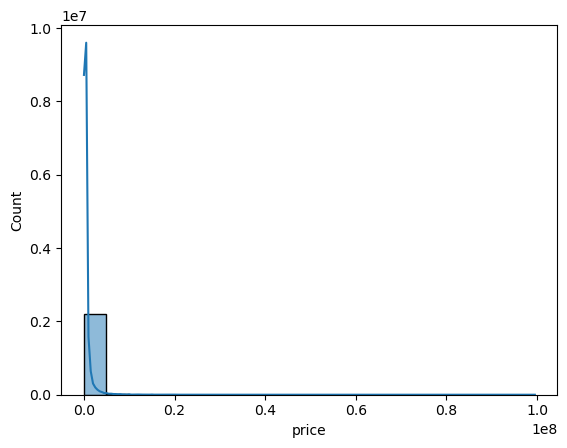

In [11]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['price'], bins = 20, kde = True)

In [13]:
#look at numbers to see the range
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06,2.213729e+06
mean,5.294047e+04,5.082119e+05,3.264167e+00,2.483447e+00,1.293017e+01,1.012618e+06,5.219676e+04,2.183073e+03
std,3.064389e+04,1.014483e+06,1.253284e+00,1.347902e+00,7.025720e+02,5.823856e+05,2.895156e+04,9.704102e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,6.010000e+02,4.000000e+00
25%,2.386500e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.700000e-01,5.090910e+05,2.962000e+04,1.454000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.496373e+00,2.600000e-01,1.012986e+06,4.843300e+04,2.156000e+03
75%,7.918400e+04,5.499990e+05,4.000000e+00,3.000000e+00,6.800000e-01,1.519010e+06,7.806400e+04,2.715133e+03
max,1.101420e+05,9.950000e+07,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.000000e+04


In [14]:
#check the median since there is such a concentration in the lower range
df['price'].median()

325000.0

In [15]:
#check the max to set the parameters
df['price'].max()

99500000.0

In [18]:
# Filtering rows where price is above 2 million
subset_df = df[df['price'] > 2000000]

# Display the subset DataFrame
print(subset_df)

         brokered_by    status       price       bed      bath  acre_lot  \
41           63639.0  for_sale   3900000.0  6.000000  6.000000      0.94   
56           55906.0  for_sale  10000000.0  6.000000  5.000000      0.12   
66           66561.0  for_sale   3250000.0  3.275919  6.000000      0.06   
124          92147.0  for_sale   8000000.0  3.275919  2.496373    247.57   
224          60831.0  for_sale   3000000.0  3.275919  6.000000      1.38   
...              ...       ...         ...       ...       ...       ...   
2218974      22910.0      sold   2950000.0  5.000000  4.000000    155.69   
2219143      15437.0      sold   2100000.0  8.000000  8.000000      6.78   
2219581     100877.0      sold   6500000.0  5.000000  6.000000     61.50   
2220215      66058.0      sold   2900000.0  3.275919  2.496373    335.30   
2221324     105917.0      sold   2500000.0  4.000000  5.000000     10.00   

            street          city        state  zip_code  house_size  \
41        269007

In [21]:
# Filtering rows where price is below 2 million
df_adjusted = df[df['price'] <= 2000000]

# Display the subset DataFrame
df_adjusted.shape

(2153049, 13)

In [24]:
# change high price to 2 million to see if anything changes in the plot
df_adjusted.loc[df['price'] < 299999, 'Price category'] = 'Low price' # below 299,999 dollars
df_adjusted.loc[(df['price'] >= 300000) & (df_adjusted['price'] <1000000), 'Price category'] = 'Middle price' #300,000 to 2 million
df_adjusted.loc[df['price'] >= 1000000.0, 'Price category'] = 'High price' # 2 milliond dollars is pretty high!

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


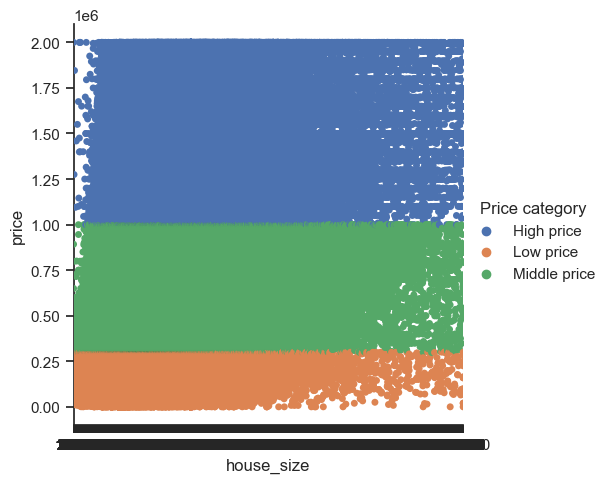

In [25]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style='ticks')
g = sns.catplot(x='house_size', y='price', hue='Price category', data=df_adjusted)

In [ ]:
# fig = g.get_figure
g.savefig('cat_plot_house_size_price3.png')